<a href="https://colab.research.google.com/github/aneetat1/NASA-SEES-Internship/blob/main/Aneeta_Thokkadam_SEES_6_Velocity_Dispersion_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aneeta Thokkadam, Climate Disaster Preparedness (O-CD), 07/01/2022 🔭**

# Making Dispersion Maps and Histograms using Python code 

In this activity, you are going to be making dispersion maps of Andromeda for 3 different types of stars: 
* Main Sequence (MS) stars, 
* Red Giant Branch (RGB) stars, and 
* Asymptotic Giant Branch (AGB) stars. 

We want to understand what these three maps tell us about the history of the Andromeda galaxy. 

*Yikes! What are these different kinds of stars? You might want to revisit the PyaR astronomy lecture videos and/or the [Stellar Evolution](https://www.youtube.com/watch?v=hbF_ELJ0Ues&feature=youtu.be) lecture from the Beyond page of SEES Lesson 1 Module 4.*

OK, back to our notebook. As usual, begin by running the first cell to import all necessary functions from *numpy* and *matplotlib*. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Setup Google Drive access for data input and output

You will also need to read in catalog text files and output plot graphics, so we need to import the *drive* and *os.path* modules and complete the related set up. 

You have done these steps before, so let's combine them into a single code block. None of the following steps are covered in the PyAR video tutorial.

Before running the code, check your Google Drive. Expand the *drive* folder to see a folder labeled *MyDrive*. Expand the *MyDrive* to see your *mySEES* folder. Make sure that the three output files from running Notebook 3, ***SEES 3-CMD Activity***, are located in your *mySEES* folder:

*   MScatalog.txt
*   AGBcatalog.txt
*   RGBcatalog.txt

If these three files are not present, re-run Notebook 3, ***SEES 3-CMD Activity.ipynb***, making sure to generate all three files.


In [ ]:
# Mount the Google Drive. 
from google.colab import drive
drive.mount('/content/drive')
# import os.path
from os import path as path

# here is the standard path to our mySEES folder
catalog_folder = '/content/drive/MyDrive/mySEES'
#classroom_folder = '' # If needed, uncomment and paste your path here.
print("My path to the mySEES folder is {}".format(catalog_folder))

Mounted at /content/drive
My path to the mySEES folder is /content/drive/MyDrive/mySEES


##An 'old' function revisited and a new one presented 

Here, we are introducing a **new** version of a function named *show_map*. You may recognize the function name from Notebook 5's activity about simulated disks but the parameters are different in this notebook. Run the below cell. You do not need to make any edits here.

In [ ]:
def show_map(xi, eta, quantity, label, fileName):
    ax = plt.axes(aspect = 'equal')
    ax.set_xlabel('xi (kpc)')
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Dispersion of Real Data')
    tt = ax.scatter(xi, eta, c = quantity, edgecolors = 'none', s = 2, vmin=40., vmax=160.)
    ax.set_xlim(1, 0)
    plt.colorbar(tt, label='Velocity Dispersion (km/s)')
    plt.text(1, 0, 'Aneeta Thokkadam')
    plt.savefig(fileName)

This next function is where we are calculating the dispersion. Fill in the incomplete lines of code below. To search for math help in python, Google *numpy* followed by the thing you want to do. 

Experiment and wrestle with the code. If you truly get stuck, post a question to the Google Classroom.

In [ ]:
def get_dispersion(x, z, v, circleSize=300./3600.):
    #initialize dispersion to all zeros
    dispersion = np.zeros(len(x)) #array of zeros

    #Loop over all items in list
    for i in range(len(x)):
        #get coordinates of the item of interest
        thisX = x[i]
        thisZ = z[i]

        #calculate array of distances to this star
        dist = np.sqrt((x-thisX)**2 + (z-thisZ)**2)
        
        #pick out stars that are closer than circleSize to the star
        keep =dist<circleSize

        #calculate the velocity dispersion of those stars; assign to the ith element
        #of the array "dispersion"
        dispersion[i] = np.std(v[keep])
        
    return dispersion

The following lines of code are going to call the above two functions to generate the plots we are interested in. It is going to read in the catalogs that you created while completing the **CMD activity** in notebook 3). **REMINDER:** If you do not have copies of these catalogs in your *mySEES* folder, re-run notebook 3. It's fine if these three files are stored in another Google Drive folder. Simply change the path to the files. If you get stuck, post a question to Google Classroom.

### Experimenting with parameters
After you've generated your first figure, play with the parameter "circleSize" when you call the get_dispersion function. 

What happens when you make *circleSize = 100./3600.*? 
 **When you make circleSize equal to 100./3600., there are more values with higher velocity dispersions that are closer to 160 km/s than when the circleSize is equal to 300./3600.**

What about *3600./3600.*? 
**When you make circleSize equal to 3600./3600., more of the data corresponds to velocity dispersion values between around 80-120 km/s**

Try to explain the differences between the two plots. 
**When the numerator of the circleSize value is 3600, it makes the actual value equal to 1.0. In the function get_dispersion, the circleSize is used to pick out the stars that are closer to the star than its value. Since circleSize was 1.0, this might mean that the stars that were kept were more near the middle of the ranger of velocity dispersion. On the other hand, when circleSize equals 100/3600., it's a much smaller decimal. This might affect the range of the stars that would be kept in the final plot.**

Change the value in the code statement to *circleSize=300./3600.* before you continue.

**IMPORTANT!** The *show_map* function triggers the saving of a png file that has the same path and name as the png name passed into the show_map() statement as the fileName variable. Look for the resulting png file in your *Classroom/SEES 2022: Python Distance Learning Module* folder.

### Intermediate Level
Your png filename should be: startype_dispersion_teamcode_LastName_Initial.png

where:
*   startype = MS, AGB or RGB,
*   teamcode = your team code,
*   LastName = your last name, and
*   Initial = the initial of your first or given name. 

Set up the teancode, LastName and Initial variables once for re-use in the next code cell.<br>
Then complete the code for all three star catalogs.

In [ ]:
team_code = 'O-CD'
last_name = 'Thokkadam'
initial = 'Aneeta'

/content/drive/MyDrive/mySEES/MScatalog.txt
/content/drive/MyDrive/mySEES/sMS_dispersion_O-CD_Thokkadam_Aneeta.png


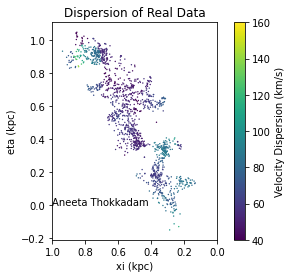

In [ ]:
# complete path and file name of the input star catalog
star_type = 'MS'
my_catalog = path.join(catalog_folder, star_type + 'catalog.txt')
print(my_catalog)
# complete path and file name of the output dispersion map PNG file

pngName = "s{}_dispersion_{}_{}_{}.png".format(star_type,
                                               team_code,last_name,initial)
my_png = path.join(catalog_folder, pngName)
print(my_png)

#Read data
xi, eta, v = np.loadtxt(my_catalog, unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
ms_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map and save as PNG
show_map(xi, eta, ms_sigma, 'Velocity dispersion (km/s)', my_png)

/content/drive/MyDrive/mySEES/AGB_tmpl.txt
/content/drive/MyDrive/mySEES/sAGB_dispersion_O-CD_Thokkadam_Aneeta.png


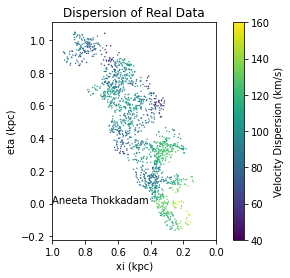

In [ ]:
#Fill in your code for the AGB stars here!
# complete path and file name of the input star catalog
star_type = 'AGB'
my_catalog = path.join(catalog_folder, star_type + '_tmpl.txt')
print(my_catalog)
# complete path and file name of the output dispersion map PNG file

pngName = "s{}_dispersion_{}_{}_{}.png".format(star_type,
                                               team_code,last_name,initial)
my_png = path.join(catalog_folder, pngName)
print(my_png)

#Read data
xi, eta, v = np.loadtxt(my_catalog, unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
agb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map and save as PNG
show_map(xi, eta, agb_sigma, 'Velocity dispersion (km/s)', my_png) 

/content/drive/MyDrive/mySEES/RGB_tmpl.txt
/content/drive/MyDrive/mySEES/sRGB_dispersion_O-CD_Thokkadam_Aneeta.png


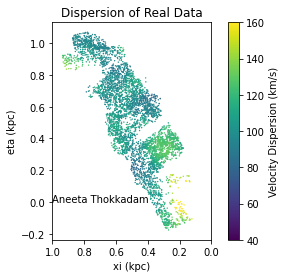

In [ ]:
#Fill in your code for the RGB stars here!
# complete path and file name of the input star catalog
star_type = 'RGB'
my_catalog = path.join(catalog_folder, star_type + '_tmpl.txt')
print(my_catalog)
# complete path and file name of the output dispersion map PNG file

pngName = "s{}_dispersion_{}_{}_{}.png".format(star_type,
                                               team_code,last_name,initial)
my_png = path.join(catalog_folder, pngName)
print(my_png)

#Read data
xi, eta, v = np.loadtxt(my_catalog, unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
rgb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map and save as PNG
show_map(xi, eta, rgb_sigma, 'Velocity dispersion (km/s)', my_png) 


# Preparing for the Basic Level Certificate

After you have attempted to run the notebook, watched the assigned videos, and possibly rerun the notebook, take the quiz to complete the requirements for Notebook 6.

We encourage you to complete the notebook and submit it as part of the Intermediate Level Certificate. You are almost there!

# Preparing for Intermediate Level Certificate
After you’ve made all 3 maps, open up all 3 plots together (they are saved in your *mySEES* folder). Look at them next to each other. What do you observe about these 3 maps? What do they have in common, and how are they different?
**The plot of the dispersion of RGB stars has the highest number of particles on the map, making its plot look much more concentrated than those of the AGB stars and MS stars. Another thing to note in the plot of RGB stars is that the range of the velocity dispersions is mostly within 80-140 km/s. For the MS stars, most of the stars have a velocity dispersion near the lower range of 40 km/s. For the AGB stars, there is a mix of velocity dispersions throughout the full range. **


**Challenge!!** Modify the *show_map* function to display your name on each dispersion map. ✅

### Histogram challenge  
Now, on to another challenge. Attempt to plot histograms for the velocity dispersions of the 3 types of stars. If you aren’t sure what a histogram is, begin by Googling that! Hint: to search for plotting help in python, Google “matplotlib” followed by the thing you want to do (for example, if I wanted to make a plot of a line, I would Google matplotlib plot line.

Try to figure this out on your own first. Then ask for help in the Classroom. Finally, the notebook 6 video tutorial holds some important clues. Your histograms will become a part of this notebook. You do not need to export PNG files of the histograms. 

Can't quite figure it out? Do the best you can. All attempts count. An empty code block doesn't.

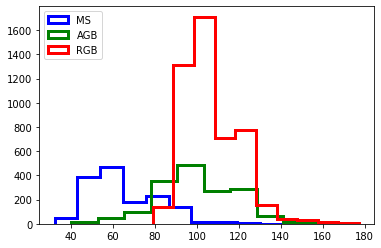

In [ ]:
#Put your histogram plotting code here! Be sure to run the code before submission.
plt.hist (ms_sigma, color = 'blue', histtype = 'step', linewidth = 3, label = 'MS')
plt.hist (agb_sigma, color = 'green', histtype = 'step', linewidth =3, label = 'AGB')
plt.hist (rgb_sigma, color = 'red', histtype = 'step', linewidth = 3, label = 'RGB')
plt.legend()
plt.show()

### Math coding challenge

Finally, compute the median velocity dispersion for each of the 3 age groups. Don't be afraid to use Google! Your answer does not have to be correct to count. The coding attempt matters.

In [ ]:
#Compute and print the median values here! 
ms_median = np.median(ms_sigma)
print(ms_median)

agb_median = np.median(agb_sigma)
print(agb_median)

rgb_median = np.median(rgb_sigma)
print(rgb_median)

60.42529202786426
98.51101300283622
104.14787497316647


### Final question
*Do your median values and histograms agree with your interpretation of the 3 maps?* 

**Write your thoughts here.** All attempts to answer question are worthwhile.

**Yes, my median values and histograms do agree with my interpretation of the 3 maps! In the histograms, there is a peak at 60 for MS, around 100 for AGB, and about 104 for RGB. These values agree with the medians calculated. They also make sense when compared to the dispersion plots, because with the MS plot, there was a greater number of particles at a velocity dispersion value around 60 km/s. For the AGB plot, most of the particles were at a value of 100 km/s, and for the RGB plot, most of the particles were at a value of 100 km/s as well, though many had higher values than the AGB plot.**

# Submitting Intermediate Level notebook and graphics
Add a new text cell to the very top of your notebook. Write your **full name**, your **team code**, your specific **team name** and the **date** in the text block.

Make sure that your saved notebook shows your output by running all code cells. Your notebook is already located in the *Your work* area for this assignment.

In the **Your work** area for this assignment, use the **+ Add or create** option to add all three dispersion map PNG files that you generated using the Python notebook code. Choose the **Google Drive** option. You might find the files in the **RECENT** pane, but you can also look in **MY DRIVE**. There, choose the **mySEES** folder. Choose the pngs, and then **INSERT**. You can add the files one by one, if that is easier.

Turn in your notebook in the Google Classroom.

# CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2022 SEES.  